In [1]:
import dish
import ugradio
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy.interpolate import interp2d
from tqdm import tqdm, trange
from astropy.coordinates import SkyCoord
from astropy import constants as c
import astropy.units as u
from scipy import interpolate

No module named 'rtlsdr'


In [2]:
df = pd.read_csv('final_data')
df

,Unnamed: 0.1,Unnamed: 0,T,v,σ,T_err,v_err,σ_err,l,b,RA,DEC,JD,v_dopp,v_corr
0,0,0,14.174216,-720.903111,135.219523,0.470910,0.002603,0.002603,160.000000,-70.0,25.246181,-10.583822,2.440616e+06,-26.972691,-747.875802
1,1,1,9.973129,-191.360333,421.427483,0.276532,0.006768,0.006768,165.847609,-70.0,26.900278,-11.751443,2.440616e+06,-26.868811,-218.229144
2,2,2,7.461899,-755.947696,83.354107,0.534593,0.003459,0.003459,171.695218,-70.0,28.447660,-13.060424,2.440616e+06,-26.686084,-782.633781
3,3,3,8.916421,-342.759431,435.888525,0.301871,0.008549,0.008549,177.542826,-70.0,29.875931,-14.500091,2.440616e+06,-26.426697,-369.186127
4,4,4,8.249704,-348.506752,445.007542,0.242567,0.007580,0.007580,183.390435,-70.0,31.174303,-16.058458,2.440616e+06,-26.093069,-374.599821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,692,692,131.307981,-1264.024034,74.414044,1.300750,0.000427,0.000427,210.771331,-10.0,93.255444,-2.651176,2.440616e+06,-16.121453,-1280.145486
693,693,693,118.488973,-1277.757310,70.934012,1.578976,0.000548,0.000548,212.802184,-10.0,94.159293,-4.436126,2.440616e+06,-15.467050,-1293.224360
694,694,694,121.200395,-1265.020828,71.468858,1.292322,0.000441,0.000441,214.833037,-10.0,95.056657,-6.225518,2.440616e+06,-14.797660,-1279.818488
695,695,695,130.870058,-1272.982252,71.923128,1.578052,0.000502,0.000502,216.863890,-10.0,95.948843,-8.018871,2.440616e+06,-14.114190,-1287.096442


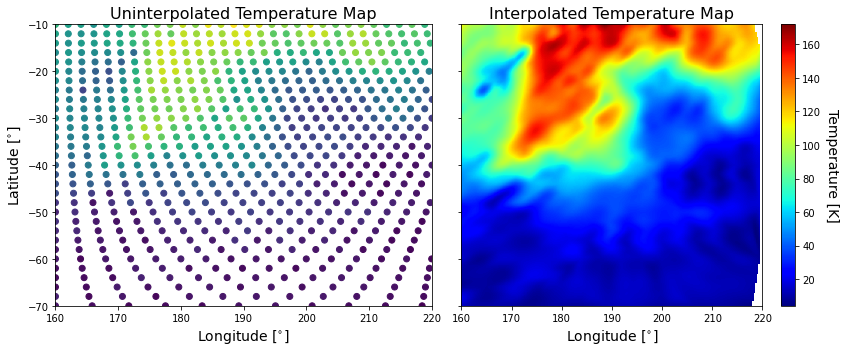

In [7]:
fig, axs = plt.subplots(1, 2, figsize=[12,5], squeeze=True, sharex=True, sharey=True)

points = (df.l, df.b)
grid_x, grid_y = np.mgrid[df.l.min():df.l.max():200j, df.b.min():df.b.max():200j]
cubic_grid_T = interpolate.griddata(points, df['T'], (grid_x, grid_y), method='cubic')

cmap1 = axs[0].scatter(df.l, df.b, c=df['T'], cmap='viridis')
axs[0].set_title('Uninterpolated Temperature Map', fontsize=16)
axs[0].set_ylabel(r'Latitude [$^{\circ}$]', fontsize=14)
axs[0].set_xlabel(r'Longitude [$^{\circ}$]', fontsize=14)

im1 = axs[1].imshow(cubic_grid_T.T, extent=[160, 220, -70, -10], aspect='auto', origin='lower', cmap='jet')
fig.colorbar(im1, ax=axs[1]).set_label('Temperature [K]', rotation=270, labelpad=18, fontsize=14)
axs[1].set_title('Interpolated Temperature Map', fontsize=16)
axs[1].set_xlabel(r'Longitude [$^{\circ}$]', fontsize=14)

fig.tight_layout()

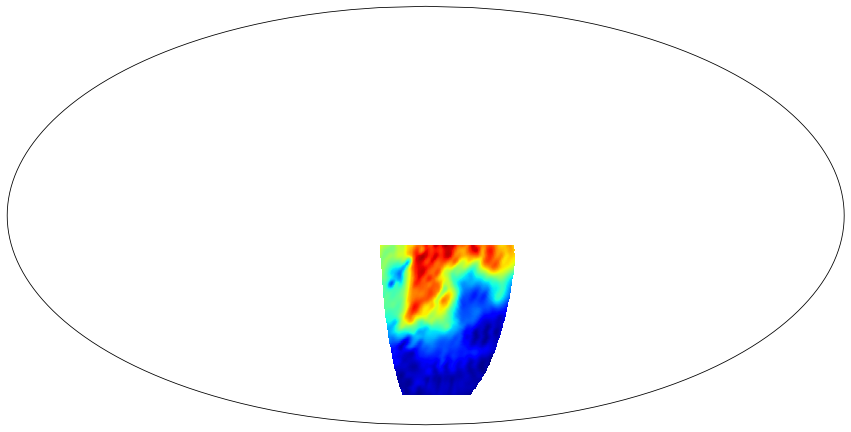

In [9]:
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.Mollweide()}, figsize=(15,15))
ax.imshow(cubic_grid_T.T, extent=[160-180,220-180,-10,-70], transform=ccrs.PlateCarree(), cmap='jet')
ax.grid()

Text(0.5, 0, '$ℓ$ [Deg]')

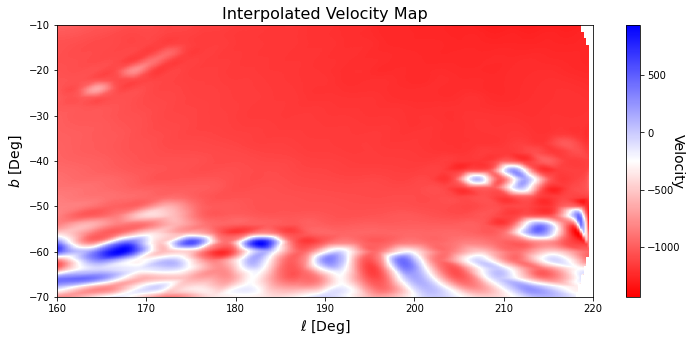

In [10]:
fig, axs = plt.subplots(1, 1, figsize=[12,5], squeeze=True, sharex=True, sharey=True)
cubic_grid_v = interpolate.griddata(points, df['v_corr'], (grid_x, grid_y), method='cubic')

im2 = axs.imshow(cubic_grid_v.T, extent=[160, 220, -70, -10], aspect='auto', origin='lower', cmap='bwr_r')
fig.colorbar(im2, ax=axs).set_label('Velocity', rotation=270, fontsize=14)
axs.set_title('Interpolated Velocity Map', fontsize=16)
axs.set_ylabel(r'$b$ [Deg]', fontsize=14)
axs.set_xlabel(r'$ℓ$ [Deg]', fontsize=14)

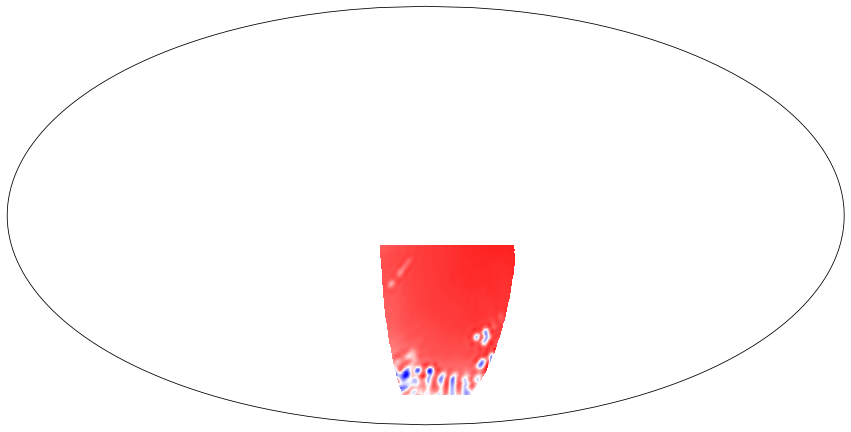

In [12]:
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.Mollweide()}, figsize=(15,15))
ax.imshow(cubic_grid_v.T, extent=[160-180,220-180,-10,-70], transform=ccrs.PlateCarree(), cmap='bwr_r')
ax.grid()